In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-09-05 18:36:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-09-05 18:36:42 (6.63 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
import pandas as pd
df=pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
               parse_dates=['Date'],
               index_col=["Date"])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
len(df)

2787

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


####For any time series problem you often have less data than other types of problem

####The **Seasonality** of a time series dataset is the number of samples collected in a year.

In [ ]:
df.head(1)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349


In [ ]:
bitcoin_prices=pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


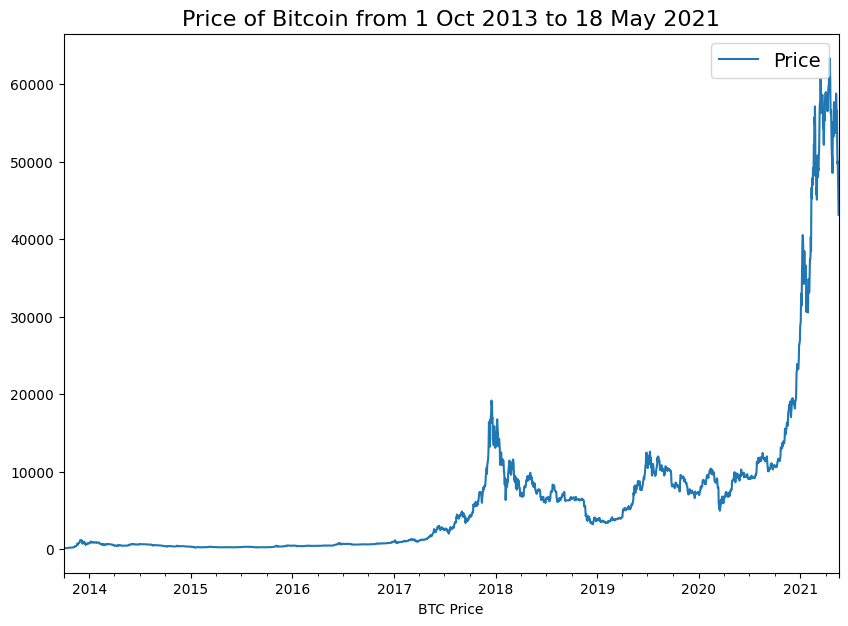

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel('BTC Price')
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
df.head(1)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349


In [ ]:
import csv
from datetime import datetime
timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",'r') as f:
  csv_reader=csv.reader(f,delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    print(line)
    timesteps.append(datetime.strptime(line[1],'%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10],btc_price[:10]

['BTC', '2013-10-01', '123.65499', '124.30466', '124.75166', '122.56349']
['BTC', '2013-10-02', '125.455', '123.65499', '125.7585', '123.63383']
['BTC', '2013-10-03', '108.58483', '125.455', '125.66566', '83.32833']
['BTC', '2013-10-04', '118.67466', '108.58483', '118.675', '107.05816']
['BTC', '2013-10-05', '121.33866', '118.67466', '121.93633', '118.00566']
['BTC', '2013-10-06', '120.65533', '121.33866', '121.85216', '120.5545']
['BTC', '2013-10-07', '121.795', '120.65533', '121.99166', '120.43199']
['BTC', '2013-10-08', '123.033', '121.795', '123.64016', '121.35066']
['BTC', '2013-10-09', '124.049', '123.033', '124.7835', '122.59266']
['BTC', '2013-10-10', '125.96116', '124.049', '128.01683', '123.81966']
['BTC', '2013-10-11', '125.27966', '125.96116', '126.43666', '124.11383']
['BTC', '2013-10-12', '125.9275', '125.27966', '126.0365', '123.12966']
['BTC', '2013-10-13', '126.38333', '125.9275', '126.8965', '125.2765']
['BTC', '2013-10-14', '135.24199', '126.38333', '135.24199', '126

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC Price')

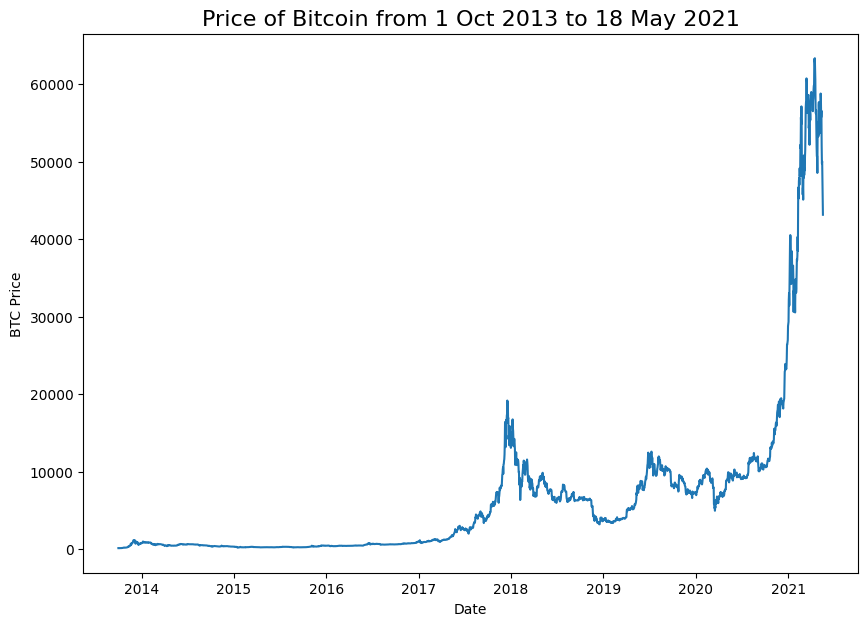

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.plot(timesteps,btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")

In [ ]:
###Create train and test sets of our time series data
timesteps[:10],bitcoin_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
                 Price
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866
 2013-10-06  120.65533
 2013-10-07  121.79500
 2013-10-08  123.03300
 2013-10-09  124.04900
 2013-10-10  125.96116)

In [ ]:
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices.Price.to_numpy()
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(timesteps,prices,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

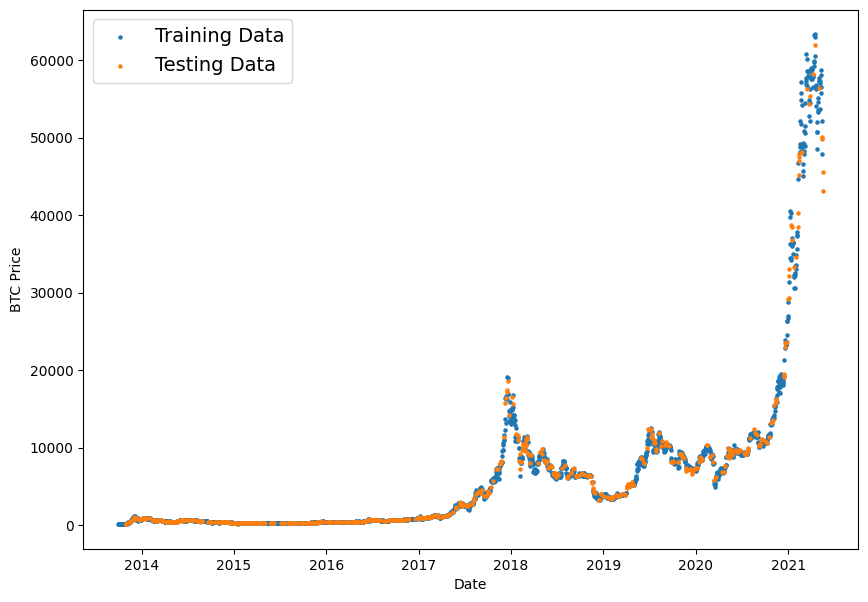

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Training Data')
plt.scatter(X_test,y_test,s=5,label='Testing Data')

plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
0.8*len(timesteps),0.2*len(timesteps)

(2229.6, 557.4)

In [ ]:
0.8*len(prices)

2229.6

In [ ]:
split_size=int(0.8*len(prices)) # Split size is 80:20
X_train,y_train=timesteps[:split_size],prices[:split_size]
x_test,y_test=timesteps[split_size:],prices[split_size:]


len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)

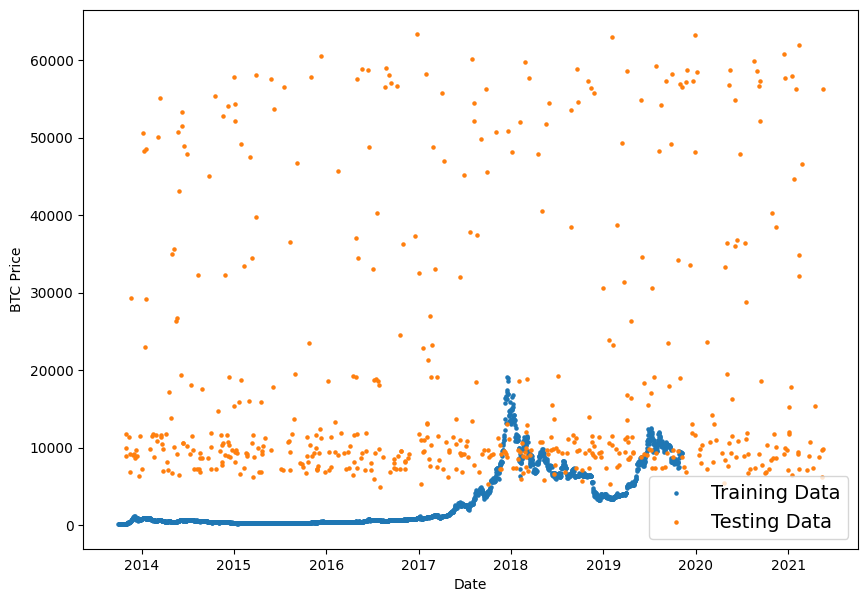

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label='Training Data')
plt.scatter(X_test,y_test,s=5,label='Testing Data')

plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],label=label)
  plt.xlabel('Time')
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

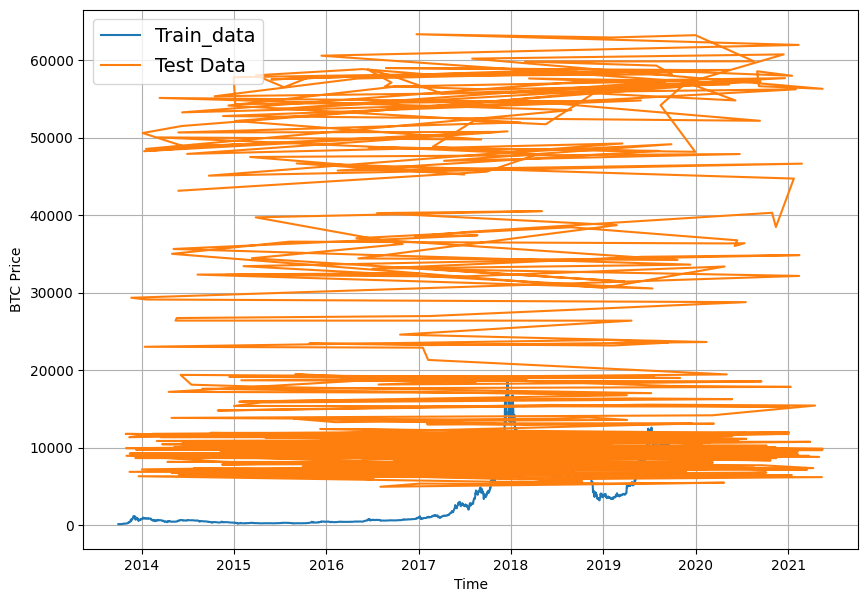

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(X_train,y_train,label='Train_data')
plot_time_series(X_test,y_test,label="Test Data")

In [ ]:
 ####Horizon: No.of time steps we want to predict in the future
 ####Window: No.of time steps we use from the past to predict horizon

The formula looks like this:
$$\hat{y}_{t}=y_{t-1}$$


In [ ]:
naive_forecast=y_test[:-1]
naive_forecast[-10:],y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

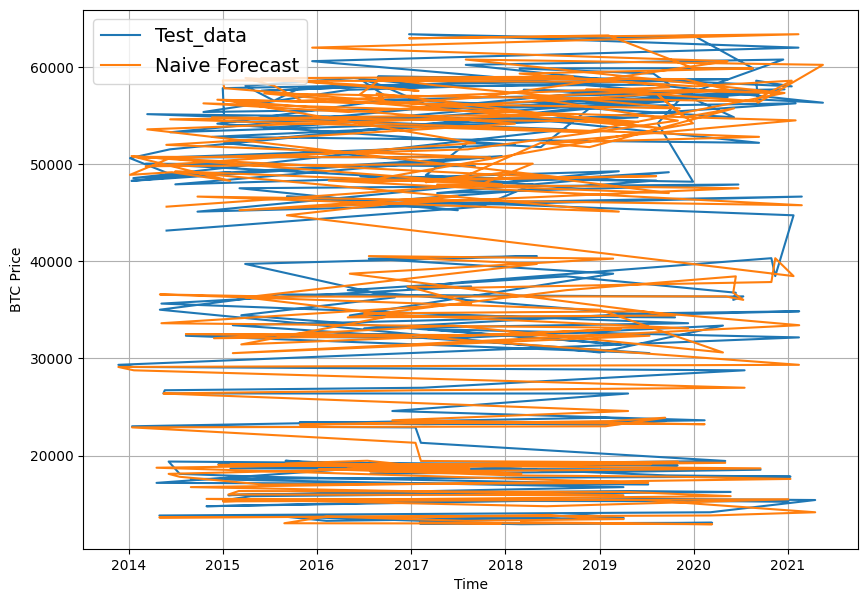

In [ ]:
plt.figure(figsize=(10,7))
# plot_time_series(X_train,y_train,label='Train_data')
plot_time_series(X_test,y_test,start=350,format='-',label='Test_data')
plot_time_series(X_test[1:],naive_forecast,start=350,format='-',label='Naive Forecast')

#Now lets the find the model which will beat Naive Forecast model

In [ ]:
import tensorflow as tf
def mean_absolute_scaled_error(y_true,y_pred):
  #Find mae of naive forecast (no seasoanlity)
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true=tf.cast(y_true,tf.float32)
  y_preds=tf.cast(y_true,tf.float32)

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape = 100*tf.reduce_mean(tf.abs((y_true-y_pred)/y_true))
  mase=mean_absolute_scaled_error(y_true,y_pred)


  return {"mae":mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         "mape":mape.numpy(),
         'mase':mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results


{'mae': 567.9802183723001,
 'mse': 1147547.0780835983,
 'rmse': 1071.2362382236695,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [ ]:
tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

### Now lets window our data. By windowing we turn our time series forecasting problem to supervised learning problem

In [ ]:
len(y_train)

2229

In [ ]:
print(f'We are going to use {btc_price[:7]} to predict {btc_price[7]}')

We are going to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [ ]:
HORIZON=1 #predict the next 1 day
WINDOW_SIZE=7 #use the past week of bitcoin to make predictions

In [ ]:
def get_labelled_window(x,HORIZON=HORIZON):
  return x[:,:-HORIZON],x[:,-HORIZON:]

In [ ]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [ ]:
tf.expand_dims(tf.range(8)+1,axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [ ]:
test_window,test_label=get_labelled_window(tf.expand_dims(tf.range(8),axis=0))

In [ ]:
print(f'test window is {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

test window is [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
len(btc_price)

2787

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
btc_prices=tf.expand_dims(btc_price,axis=0)

In [ ]:
len(btc_price)

2787

In [ ]:
btc_prices.shape

TensorShape([1, 2787])

#Create a window step of specific window size
# Then use numpy indexing to create a 2D array of multiple window steps

In [ ]:
###Create the function to view numpy arrays as windows.
WINDOW_SIZE=7
HORIZON=1

def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):

  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)

  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T

  windowed_array=x[window_indexes]

  windows,labels=get_labelled_window(windowed_array,HORIZON=horizon)

  return windows,labels

In [ ]:
import numpy as np
full_windows,full_labels=make_windows(prices)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Full windows is {full_windows[i-3]} -> Label is {full_labels[i-3]}")

Full windows is [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label is [47885.62525472]
Full windows is [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label is [45604.61575361]
Full windows is [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label is [43144.47129086]


In [ ]:
make_windows(prices)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
make_windows(prices)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
make_windows(prices)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
full_labels[0]

array([123.033])

In [ ]:
def make_train_test_splits(windows,labels,test_split=0.2):
  split_size=int(len(windows)*(1-test_split))
  print(split_size)
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

2224


(2224, 556, 2224, 556)

In [ ]:

train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
import os
def create_model_checkpoint(model_name,save_path='model_experiments.keras'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_name,save_path),
                                            verbose=0,
                                            monitor='val_loss',
                                            save_best_only=True)

In [ ]:
train_labels.ndim

2

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
np.array_equal(tf.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

In [ ]:
-HORIZON-1

-2

In [ ]:
train_labels[:-2]

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9369.62808116],
       [9326.59962378],
       [9335.75240233]])

In [ ]:
y_train[7:]

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
len(y_train)

2229

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON,activation='linear')],name='model_1_dense')


model_1.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae','mse'])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1542.9597 - mae: 1542.9597 - mse: 10144381.0000 - val_loss: 747.2007 - val_mae: 747.2007 - val_mse: 1925847.7500
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.4694 - mae: 136.4694 - mse: 101796.7734 - val_loss: 707.5779 - val_mae: 707.5779 - val_mse: 1686641.0000
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.8087 - mae: 128.8087 - mse: 91903.1719 - val_loss: 679.3112 - val_mae: 679.3112 - val_mse: 1570489.5000
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128.5219 - mae: 128.5219 - mse: 90066.9297 - val_loss: 663.3246 - val_mae: 663.3246 - val_mse: 1496283.6250
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126.7297 - mae: 126.7297 - mse: 86173.6250 - val_loss: 918.5167 - val_mae: 918.5167 - val_mse: 2249564.7500
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.0255 - mae: 128.0255 - mse: 86280.2109 - val_loss: 748.3030 - val_mae: 748.3030 - val_mse: 16826

In [ ]:
naive_results

{'mae': 567.9802183723001,
 'mse': 1147547.0780835983,
 'rmse': 1071.2362382236695,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 309.0762 - mae: 309.0762 - mse: 377166.4688


[615.7268676757812, 615.7268676757812, 1250092.375]

In [ ]:
model_1=tf.keras.models.load_model('/content/model_1_dense/model_experiments.keras')

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 280.0721 - mae: 280.0721 - mse: 341031.4062 


[563.7625122070312, 563.7625122070312, 1151438.0]

In [ ]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8818.361 , 8774.037 , 9057.413 , 8754.14  , 8731.045 , 8742.676 ,
        8664.081 , 8517.3125, 8448.465 , 8532.963 ], dtype=float32)>)

In [ ]:
len(test_windows)

556

In [ ]:
model_1_preds.shape

TensorShape([556])

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
model_1_preds.ndim,test_labels.ndim

(1, 2)

In [ ]:
model_1_results =evaluate_preds(y_true=tf.squeeze(test_labels),
               y_pred=model_1_preds)


In [ ]:
model_1_results

{'mae': 563.76245,
 'mse': 1151438.1,
 'rmse': 1073.0509,
 'mape': 2.5118816,
 'mase': 0.9903745}

In [ ]:
naive_results

{'mae': 567.9802183723001,
 'mse': 1147547.0780835983,
 'rmse': 1071.2362382236695,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
X_test[:10]

array(['2019-06-11T00:00:00.000000000', '2021-05-03T00:00:00.000000000',
       '2017-10-05T00:00:00.000000000', '2019-06-22T00:00:00.000000000',
       '2019-07-21T00:00:00.000000000', '2014-02-19T00:00:00.000000000',
       '2020-06-08T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2018-01-28T00:00:00.000000000', '2016-09-24T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
test_labels[:,].shape

(556, 1)

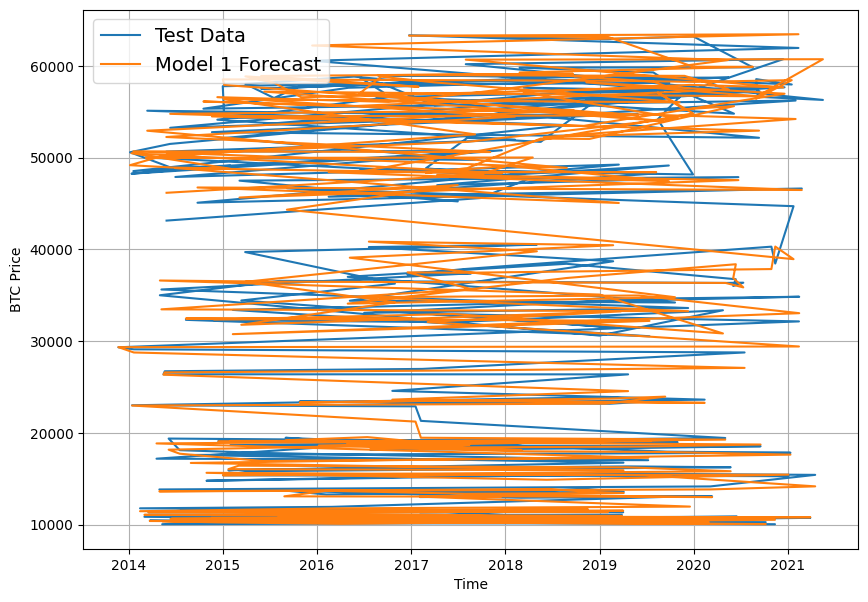

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_labels):],values=test_labels[:,0],start=offset,label='Test Data')
plot_time_series(X_test[-len(test_labels):],values=model_1_preds,start=offset,label='Model 1 Forecast',format='-')
plt.legend(fontsize=14);


###AutoRegression Model

In [ ]:

HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past


In [ ]:
full_windows,full_labels=make_windows(prices,WINDOW_SIZE,HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2205


(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
],name='model_2_dense')

model_2.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])

model_2.fit(train_windows,
            train_labels,validation_data=(test_windows,test_labels),
            epochs=100,batch_size=128,verbose=0,callbacks=[create_model_checkpoint(model_2.name)])

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 340.8479 - mae: 340.8479 


[644.8444213867188, 644.8444213867188]

In [ ]:
model_2=tf.keras.models.load_model("/content/model_2_dense/model_experiments.keras")
model_2.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 302.5997 - mae: 302.5997  


[597.16796875, 597.16796875]

In [ ]:
model_2_preds=make_preds(model_2,test_windows)
model_2_preds.ndim

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


1

In [ ]:
len(model_2_preds),len(test_windows)

(552, 552)

In [ ]:
model_2_results=evaluate_preds(tf.squeeze(test_labels),model_2_preds)

In [ ]:
model_2_results


{'mae': 597.1679,
 'mse': 1223649.9,
 'rmse': 1106.1871,
 'mape': 2.6967947,
 'mase': 1.0438553}

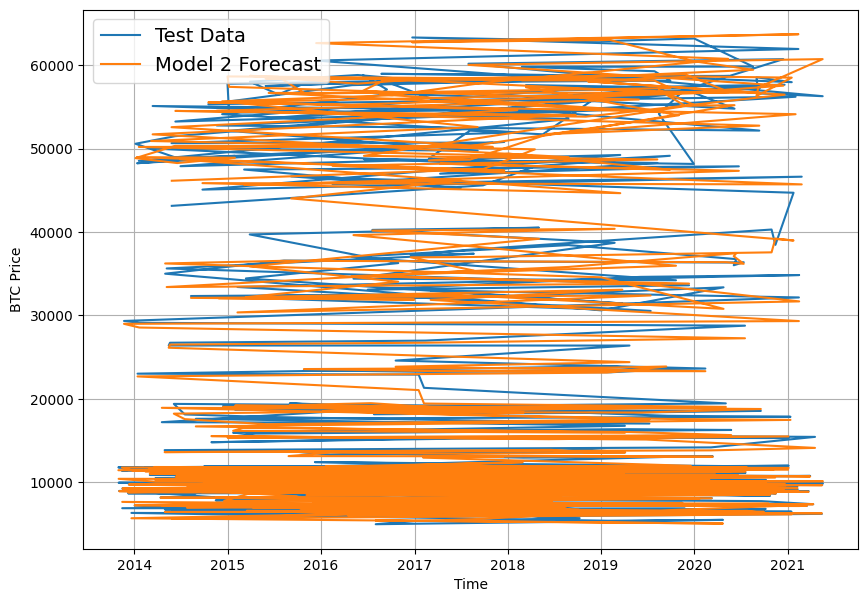

In [ ]:
offset=30
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_labels):],values=test_labels[:,0],start=offset,label='Test Data')
plot_time_series(timesteps=X_test[-len(test_labels):],values=model_2_preds,start=offset,label='Model 2 Forecast',format='-')
plt.legend(fontsize=14);

In [ ]:
X_test.shape,test_windows.shape

((558,), (552, 30))

In [ ]:
len(X_test),len(test_windows)

(558, 552)

In [ ]:

HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2751, 2751)

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

2200


(2200, 2200, 551, 551)

In [ ]:
len(train_windows),len(train_labels)

(2200, 2200)

In [ ]:
model_3=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
],name='model_3_dense')

model_3.compile(loss='mae',
                optimizer="Adam")

model_3.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=100,
            verbose=0,
            batch_size=128,
            callbacks=[create_model_checkpoint(model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 650.9850 


1269.3192138671875

In [ ]:
model_3=tf.keras.models.load_model("/content/model_3_dense/model_experiments.keras")
model_3.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 647.4611 


1263.282470703125

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9440.968 , 9312.406 , 9445.518 , 9466.697 , 9609.892 , 9344.293 ,
        9222.361 ],
       [9159.477 , 9023.56  , 9232.473 , 9142.529 , 9328.34  , 9074.969 ,
        9072.802 ],
       [9035.617 , 8833.695 , 9118.3125, 9042.126 , 9104.48  , 8991.572 ,
        9047.686 ],
       [9256.811 , 9023.48  , 9292.4795, 9335.501 , 9167.1   , 9162.788 ,
        8901.789 ],
       [9174.202 , 9057.489 , 9119.303 , 9168.429 , 9203.212 , 8997.628 ,
        8789.05  ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)


In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true=tf.cast(y_true,tf.float32)
  y_preds=tf.cast(y_true,tf.float32) # You probably meant to cast y_pred here

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape = 100*tf.reduce_mean(tf.abs((y_true-y_pred)/y_true))
  mase=mean_absolute_scaled_error(y_true,y_pred)


  if mae.ndim>0:
    mae=tf.reduce_mean(mae) # Pass mae as an argument
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_max(mape)
    mase=tf.reduce_max(mase)



  return {"mae":mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         "mape":mape.numpy(),
         'mase':mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results


{'mae': 1263.2825,
 'mse': 5476252.5,
 'rmse': 1458.5605,
 'mape': 5.746954,
 'mase': 2.24794}

In [ ]:
HORIZON,WINDOW_SIZE

(7, 30)

In [ ]:
model_3_results

{'mae': 1263.2825,
 'mse': 5476252.5,
 'rmse': 1458.5605,
 'mape': 5.746954,
 'mase': 2.24794}

<Axes: >

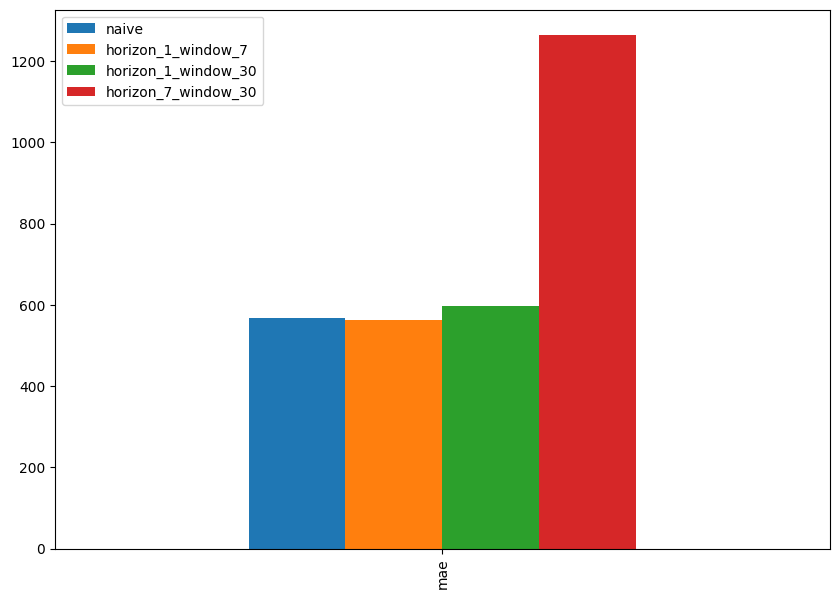

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},index=['mae']).plot(kind='bar',figsize=(10,7))

In [ ]:
test_labels

array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

In [ ]:
model_3.evaluate(test_windows,test_labels)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 647.4611 


1263.282470703125

In [ ]:
model_3_results['mae']

1263.2825

In [ ]:
tf.reduce_mean(model_3_results['mae']).numpy()

1263.2825

In [ ]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([9440.968, 9312.406, 9445.518, 9466.697, 9609.892, 9344.293,
       9222.361], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds[0],axis=0)

<tf.Tensor: shape=(), dtype=float32, numpy=9406.019>

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
full_windows,full_labels=make_windows(prices,WINDOW_SIZE,HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

2224


(2224, 556, 2224, 556)

In [ ]:
x=tf.constant(train_windows[0])
print(type(tf.expand_dims(x,axis=1)))
tf.expand_dims(x,axis=1)


<class 'tensorflow.python.framework.ops.EagerTensor'>


<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]])>

In [ ]:
x=tf.constant(train_windows[0])
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))
print(f"Orginal shape: {x.shape}")
print(f"Expanded shaped:{expand_dims_layer(x).shape}")
print(f"Original Values with expanded shape is {expand_dims_layer(x)}")
print(f"Original Values with expanded shape is {type(expand_dims_layer(x))}")

Orginal shape: (7,)
Expanded shaped:(7, 1)
Original Values with expanded shape is [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]
Original Values with expanded shape is <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,padding='causal',activation='relu'),
    layers.Dense(HORIZON)
],name='model_4_conv1D')

model_4.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae'])
model_4.fit(train_windows,
            train_labels,
            validation_data=(test_windows,test_labels),
            epochs=100,
            verbose=0,
            callbacks=[create_model_checkpoint(model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [ ]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8803.149, 8721.594, 8988.454, 8724.371, 8696.93 , 8695.441,
       8622.922, 8462.505, 8419.963, 8474.421], dtype=float32)>

In [ ]:
model_4_preds.shape,test_labels.shape

(TensorShape([556]), (556, 1))

In [ ]:
model_4_results=evaluate_preds(tf.squeeze(test_labels),model_4_preds)

In [ ]:
model_4_results

{'mae': 578.7557,
 'mse': 1170671.2,
 'rmse': 1081.9756,
 'mape': 2.5845463,
 'mase': 1.0167134}

##Conv1D-(batch_size,timesteps,input_dim)

#Batch size will be taken care by the model
# timesteps is basically the features
# input_dim is the HORIZON

###SO we are keeping HORIZON=1 and WINDOW_SIZE=7

In [ ]:
tf.random.set_seed(42)
inputs=layers.Input(shape=(WINDOW_SIZE,))
x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
x=layers.LSTM(128)(x)
output=layers.Dense(HORIZON)(x)


model_5=tf.keras.Model(inputs=inputs,outputs=output,name='model_5_LSTM')
model_5.compile(loss='mae',
                optimizer='Adam')


model_5.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=100,
            verbose=1,
            callbacks=[create_model_checkpoint(model_5.name)])


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3165.1282 - val_loss: 20091.5449
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3161.1025 - val_loss: 20088.3555
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3157.7576 - val_loss: 20084.7383
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3154.2673 - val_loss: 20081.6074
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3151.1687 - val_loss: 20078.5801
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3148.1545 - val_loss: 20075.4902
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3145.0364 - val_loss: 20072.4023
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3141.9683 - val_loss: 20069.3789
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3138.9512 - val_loss: 20066.3828
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3135.9602 - val_loss: 20063.4023
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3132.9861 - val_lo

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([294.6373, 294.6373, 294.6373, 294.6373, 294.6373, 294.6373,
       294.6373, 294.6373, 294.6373, 294.6373], dtype=float32)>

In [ ]:
model_5_results=evaluate_preds(tf.squeeze(test_labels),
                               model_5_preds)
model_5_results

{'mae': 19801.732,
 'mse': 699305200.0,
 'rmse': 26444.379,
 'mape': 97.52869,
 'mase': 34.78616}

In [ ]:
###Let't make a multivariate time-series dataset

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:

# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

In [ ]:
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [ ]:
type(block_reward_2_datetime),type(block_reward_3_datetime)

(numpy.datetime64, numpy.datetime64)

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days




(1012, 2414)

In [ ]:

# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# # Set values of block_reward column (it's the last column hence -1 indexing on iloc)
# bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
# bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
# bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
# bitcoin_prices_block.head()



bitcoin_prices_block.head()
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

bitcoin_prices_block.head()


,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


<Axes: xlabel='Date'>

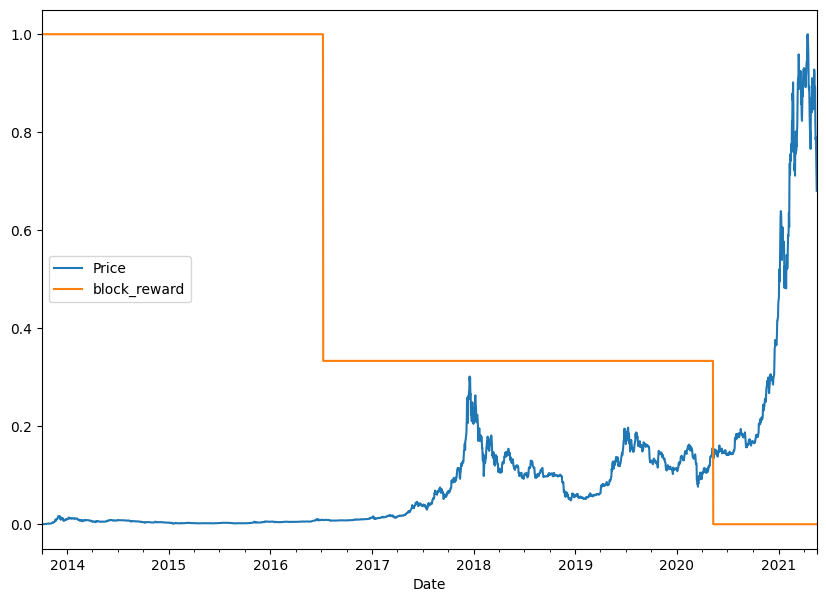

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                   columns=bitcoin_prices_block.columns,
                                   index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
####Now as we are working with multivariate time series data your make_window method will not work and we have to use some other
###methods of tf.data.dataset methods to work on this.
##We are gonna use to Pandas.shift()

##Setup database hyperparameters
HORIZON=1
WINDOW_SIZE=7

In [ ]:

# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
bitcoin_prices_windowed=bitcoin_prices_block.copy()
bitcoin_prices_windowed.head()


for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i+1}']=bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


In [ ]:
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
],name='model_6_dense_multivariate')



model_6.compile(loss='mae',
                optimizer='Adam')


model_6.fit(X_train,y_train,
            validation_data=(X_test,y_test),
            epochs=100,batch_size=128,
            verbose=0,
            callbacks=[create_model_checkpoint(model_6.name)])

In [ ]:
model_6_preds=tf.squeeze(model_6.predict(X_test))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.031, 8841.688, 9101.762, 8818.562, 8774.087, 8787.647,
       8715.989, 8583.648, 8494.039, 8582.207], dtype=float32)>

In [ ]:
len(X_test)

556

In [ ]:
model_6_results=evaluate_preds(y_test,model_6_preds)
model_6_results

{'mae': 573.827,
 'mse': 1178243.1,
 'rmse': 1085.4691,
 'mape': 2.568433,
 'mase': 1.0080551}

In [ ]:
naive_results

{'mae': 567.9802183723001,
 'mse': 1147547.0780835983,
 'rmse': 1071.2362382236695,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
WINDOW_SIZE=7
HORIZON=1

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):#It takes care of all the arugments of parent class
      super().__init__(**kwargs)
      self.input_size=input_size
      self.theta_size=theta_size
      self.horizon=horizon
      self.n_neurons=n_neurons
      self.n_layers=n_layers

      self.hidden=[tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]
      #Output of this will go to theta layer with linera activation
      self.theta_layer=tf.keras.layers.Dense(theta_size,activation='linear',name='theta')

  def call(self,inputs):
      x=inputs
      for layer in self.hidden:
        x=layer(x)
      theta=self.theta_layer(x)
      backcast,forecast=theta[:,:self.input_size],theta[:,-self.horizon:]
      return backcast,forecast



In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)

In [ ]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)
backcast.numpy(),forecast.numpy()

(array([[ 0.43337056, -0.03332983, -0.6367707 ,  0.5163087 ,  0.06786831,
          0.32940656,  0.23841035]], dtype=float32),
 array([[0.01077494]], dtype=float32))

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_n_beats=bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_n_beats[f'Price+{i+1}']=bitcoin_prices_n_beats['Price'].shift(periods=i+1)

bitcoin_prices_n_beats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
X=bitcoin_prices_n_beats.dropna().drop('Price',axis=1)
y=bitcoin_prices_n_beats.dropna()['Price']

split_size=int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)


test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))


BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE


(7, 8)

In [ ]:
tensor_1=tf.range(10)+10
tensor_2=tf.range(10)

subtracted=layers.subtract([tensor_1,tensor_2])

In [ ]:
subtracted.numpy()

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)

In [ ]:
added=layers.add([tensor_1,tensor_2])

In [ ]:
added.numpy()

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)

###The N-Beats Algorithm uses double residual stacking to help training its deeper architectures

In [ ]:
%%time

tf.random.set_seed(42)

nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name='InitialBlock')

#Create an input to stack
stack_input=layers.Input(shape=(INPUT_SIZE,),name='stack_input')

residuals,forecast=nbeats_block_layer(stack_input)

for i,_ in enumerate(range(N_STACKS-1)):
  backcast,block_forecast=NBeatsBlock(input_size=INPUT_SIZE,
                                      theta_size=THETA_SIZE,
                                      horizon=HORIZON,
                                      n_neurons=N_NEURONS,
                                      n_layers=N_LAYERS,
                                      name=f"NBeatsBlock_{i}")(residuals)


  residuals=layers.subtract([residuals,backcast],name=f'subtract_{i}')
  forecast=layers.add([forecast,block_forecast],name=f'add_{i}')


model_7=tf.keras.Model(inputs=stack_input,
                       outputs=forecast,
                       name='MODEL_7_INPUTS')

model_7.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae','mse'])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=0,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200,restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=100,verbose=1)])



KeyboardInterrupt: 

In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - loss: 835.6261 - mae: 835.6261 - mse: 1963073.1250


[835.6260986328125, 835.6260986328125, 1963073.125]

In [ ]:
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9184.885, 9094.726, 9301.569, 9081.655, 9052.82 , 9018.699,
       8968.081, 8816.815, 8753.466, 8797.915], dtype=float32)>

In [ ]:
model_7_results=evaluate_preds(y_test,y_preds)
model_7_results

NameError: name 'y_preds' is not defined

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7,show_shapes=True)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fn=['mae','mse','mape']):
  ensemble_models=[]
  for i in range(num_iter):

    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model_number: {i}")
      model=tf.keras.Sequential([
          layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          layers.Dense(horizon)
      ])

      model.compile(loss=loss_function,
                    optimizer='Adam',
                    metrics=['mae','mse'])
      model.fit(train_data,num_epochs,
                validation_data=test_data,
                epochs=num_epochs,
                verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.ReduceLROnPlateau(monitor='val_loss',patience=100,
                                                      verbose=1)])

      ensemble_models.append(model)

    return ensemble_models





In [ ]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

In [ ]:

# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds


In [ ]:
def get_upper_lower(preds):
  std=tf.reduce_std(preds,axis=0)
  interval=1.96*std
  preds_mean=tf.reduce_mean(preds,axis=0)
  lower,upper=preds_mean-interval,preds_mean+interval
  return lower,upper

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);


In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:

# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't

In [ ]:

# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 day

In [ ]:
# 1. Create function to make predictions into the future
# def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
#   """
#   Makes future forecasts into_future steps after values ends.

#   Returns future forecasts as list of floats.
#   """
#   # 2. Make an empty list for future forecasts/prepare data to forecast on
#   future_forecast = []
#   last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

#   # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
#   for _ in range(into_future):

#     # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
#     future_pred = model.predict(tf.expand_dims(last_window, axis=0))
#     print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

#     # Append predictions to future_forecast
#     future_forecast.append(tf.squeeze(future_pred).numpy())
#     # print(future_forecast)

#     # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
#     last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

#   return future_forecast



def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE) ->list:
    future_forecast=[]
    last_window=values[-window_size:]

    for _ in range(into_future):
      future_pred=model.predict(tf.expand_dims(last_window,axis=0))
      print(f"Predicting on: \n {last_window} -> Prediction is {tf.squeeze(future_pred).numpy()}")

      future_forecast.append(tf.squeeze(future_pred).numpy())

      last_window=np.append(last_window,future_pred)[-WINDOW_SIZE:]

    return future_forecast

In [ ]:
future_forecast = make_future_forecasts(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction is 55520.3203125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55520.3203125 ] -> Prediction is 50931.56640625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55520.3203125  50931.56640625] -> Prediction is 50349.7109375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55520.3203125  50931.56640625 50349.7109375 ] -> Prediction is 47851.83203125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55520.3203125
 50931.56640625 50349.7109375  47851.83203125] -> Prediction is 46104.96875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37m

In [ ]:

def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast



(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55520.32 , 50931.566, 50349.71 , 47851.832, 46104.97 ,
        46212.473, 47835.574, 54385.613, 50174.766, 49178.46 , 46196.445,
        46154.72 , 47897.336, 50421.734], dtype=float32))

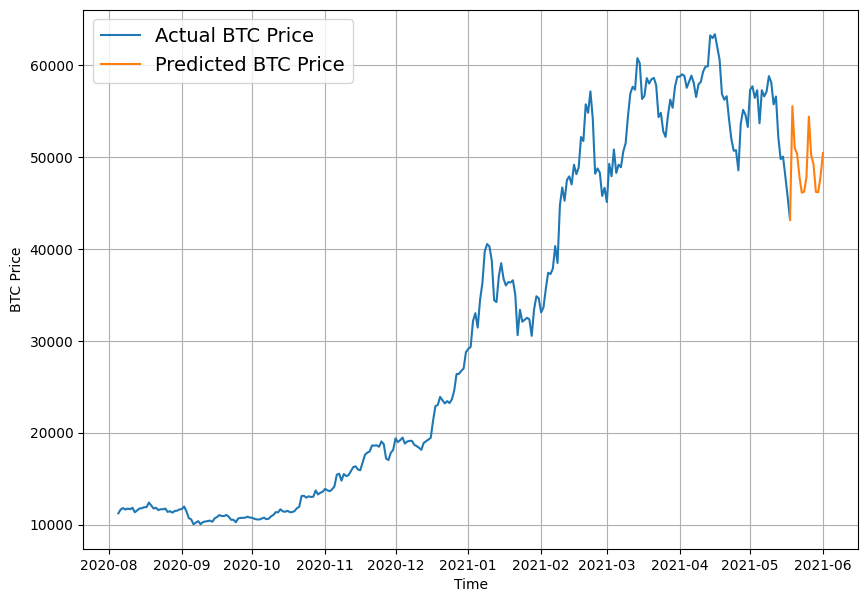

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
np.array(bitcoin_prices.index)

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:

# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

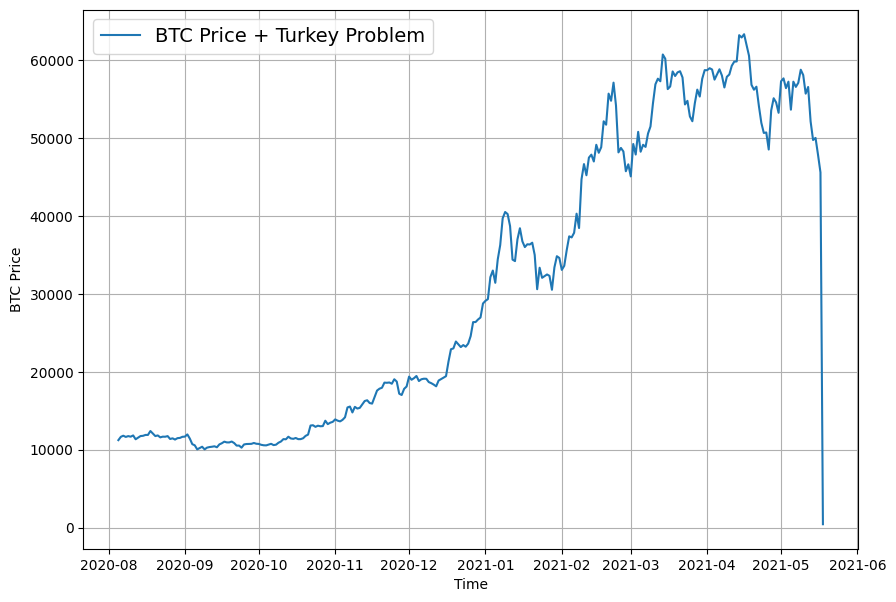

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

2224


(2224, 556, 2224, 556)

In [ ]:
turkey_model=tf.keras.models.clone_model(model_1)
turkey_model.name='turkey_model'

turkey_model.compile(loss='mae',
                     optimizer='Adam')

turkey_model.fit(X_train,y_train,
                 validation_data=(X_test,y_test),
                 epochs=100,
                 verbose=0,
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 335.6113 


722.3002319335938

In [ ]:
turkey_model = tf.keras.models.load_model("/content/turkey_model/model_experiments.keras")
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288.3638  


640.5022583007812

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.565, 8781.061, 9063.476, 8765.121, 8752.241, 8737.725,
       8685.005, 8497.695, 8465.226, 8534.065], dtype=float32)>

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 640.50226,
 'mse': 4867493.0,
 'rmse': 640.50226,
 'mape': 121.5534,
 'mase': 26.530212}

In [ ]:
model_1_results

{'mae': 563.76245,
 'mse': 1151438.1,
 'rmse': 1073.0509,
 'mape': 2.5118816,
 'mase': 0.9903745}

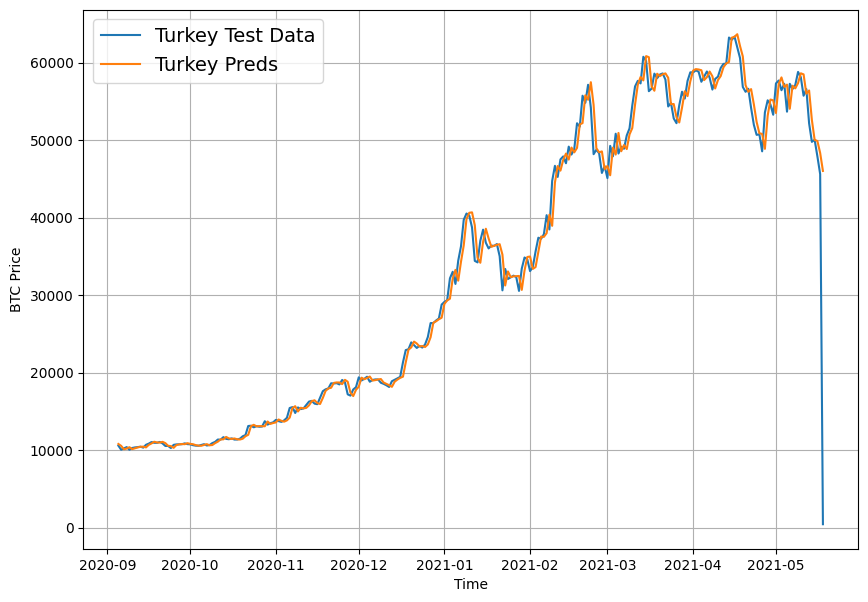

In [ ]:

plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,

                              "model_10_turkey": turkey_results}).T
model_results.head(10)


,mae,mse,rmse,mape,mase
naive_model,567.980218,1.147547e+06,1071.236238,2.516525,0.999570
model_1_dense_w7_h1,563.762451,1.151438e+06,1073.050903,2.511882,0.990375
model_2_dense_w30_h1,597.167908,1.223650e+06,1106.187134,2.696795,1.043855
model_3_dense_w30_h7,1263.282471,5.476252e+06,1458.560547,5.746954,2.247940
model_4_CONV1D,578.755676,1.170671e+06,1081.975586,2.584546,1.016713
model_5_LSTM,19801.732422,6.993052e+08,26444.378906,97.528687,34.786160
model_6_multivariate,573.827026,1.178243e+06,1085.469116,2.568433,1.008055
model_10_turkey,640.502258,4.867493e+06,640.502258,121.553398,26.530212


<Axes: >

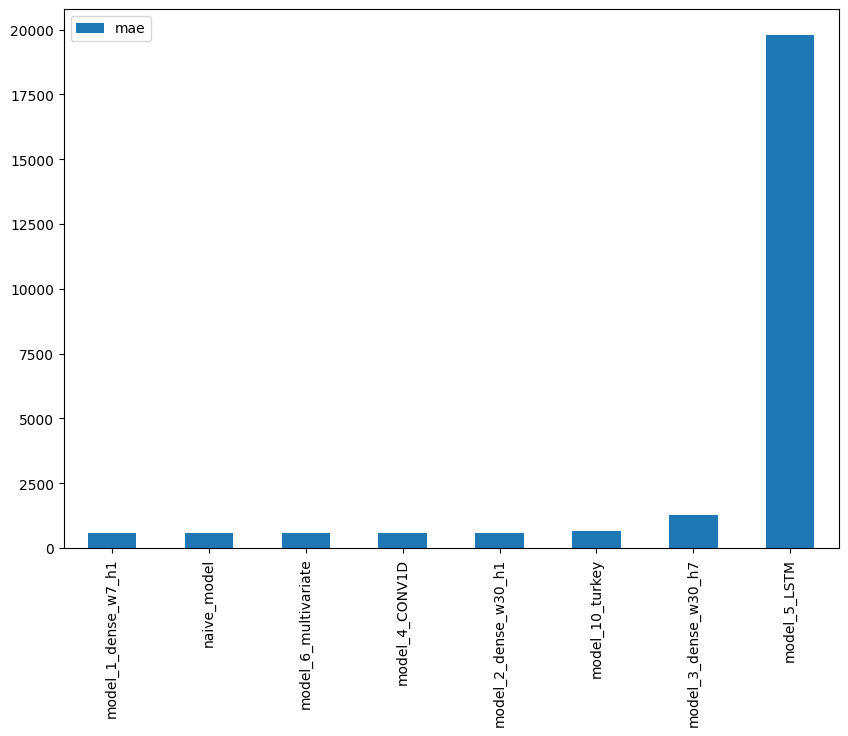

In [ ]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7),kind='bar')